<a href="https://colab.research.google.com/github/svganapathi/NM-Course/blob/main/Data_Python_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Print a Simple Statement**

In [ ]:
print("Hello, Excited to start Data Science.")

Hello, Excited to start Data Science.


## **Python Basics**

**Variable Assignment (Storing Customer Data)**

In [ ]:
customer_name = "John Doe"
customer_age = 28
customer_balance = 120.75
print("Customer:", customer_name)
print("Age:", customer_age)
print("Balance:", customer_balance)

Customer: John Doe
Age: 28
Balance: 120.75


**Arithmetic Operations (Applying Discount)**

In [ ]:
product_price = 200
discount = product_price * 0.10 # 10% discount
final_price = product_price - discount
print("Final Price after Discount:", final_price)

Final Price after Discount: 180.0


## **NumPy Basics**

**Create NumPy Arrays (Sales Data)**

In [ ]:
import numpy as np
sales = np.array([150, 200, 250, 300, 400, 350, 500]) # Sales for each day
print("Sales Data:", sales)

Sales Data: [150 200 250 300 400 350 500]


**Statistical Analysis (Sales Performance)**

In [ ]:
print("Average Sales:", np.mean(sales))
print("Highest Sale:", np.max(sales))
print("Lowest Sale:", np.min(sales))

Average Sales: 307.14285714285717
Highest Sale: 500
Lowest Sale: 150


## **Pandas Basics**

**Create a DataFrame (Customer Transactions)**

In [ ]:
import pandas as pd
data = {
"Customer": ["Alice", "Bob", "Charlie"],
"Age": [25, 30, 35],
"Amount Spent": [120, 200, 150]
}
df = pd.DataFrame(data)
print(df)

  Customer  Age  Amount Spent
0    Alice   25           120
1      Bob   30           200
2  Charlie   35           150


**Load and View a CSV File**

In [ ]:
from google.colab import files
uploaded = files.upload() # Upload your CSV file
df = pd.read_csv("customer_data.csv") # Replace with your file name
df.head()

## **Data Manipulation with Pandas**

**Filter High-Spending Customers**

In [ ]:
high_spenders = df[df["Amount Spent"] > 150]
print(high_spenders)

  Customer  Age  Amount Spent
1      Bob   30           200


**Sorting Customers by Spending**

In [ ]:
df_sorted = df.sort_values(by="Amount Spent", ascending=False)
print(df_sorted)

  Customer  Age  Amount Spent
1      Bob   30           200
2  Charlie   35           150
0    Alice   25           120


**Add a New Column (Loyalty Points Calculation)**

In [ ]:
df["Loyalty Points"] = df["Amount Spent"] // 10
print(df)

  Customer  Age  Amount Spent  Loyalty Points
0    Alice   25           120              12
1      Bob   30           200              20
2  Charlie   35           150              15


**Saving Processed Data**

In [ ]:
df.to_csv("cleaned_customer_data.csv", index=False)
files.download("cleaned_customer_data.csv") # Download the file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
---

## **Handling Missing Values & Duplicates**

In [ ]:
# Check for missing values
print(df.isnull().sum())

Customer          0
Age               0
Amount Spent      0
Loyalty Points    0
dtype: int64


**Remove Missing Values**

In [ ]:
df_cleaned = df.dropna() # Removes rows with missing values
print(df_cleaned)

  Customer  Age  Amount Spent  Loyalty Points
0    Alice   25           120              12
1      Bob   30           200              20
2  Charlie   35           150              15


**Fill Missing Values (Imputation)**

`Fill with Mean/Median (For Numerical Data)`

In [ ]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Marks"].fillna(df["Marks"].median(), inplace=True)
df["Attendance"].fillna(df["Attendance"].mean(), inplace=True)

`Fill with Mode (For Categorical Data)`

In [ ]:
df["Passed"].fillna(df["Passed"].mode()[0], inplace=True)

`Forward Fill & Backward Fill`

In [ ]:
df.ffill(inplace=True) # Forward fill
df.bfill(inplace=True) # Backward fill

**Remove Duplicates**

In [ ]:
df.drop_duplicates(inplace=True)

## **Data Transformation: Scaling & Encoding**

`Feature Scaling`

**Standardization (Z-score Normalization)**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[["Marks", "Attendance"]] = scaler.fit_transform(df[["Marks", "Attendance"]])
print(df_scaled)

**Min-Max Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled[["Marks", "Attendance"]] = scaler.fit_transform(df[["Marks", "Attendance"]])
print(df_scaled)

`Encoding Categorical Variables`

**One-Hot Encoding**

In [ ]:
df_encoded = pd.get_dummies(df, columns=["Passed"], drop_first=True)
print(df_encoded)

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Passed"] = encoder.fit_transform(df["Passed"])
print(df)

## **Feature Engineering**

**Deriving a new feature: Performance Category**

In [ ]:
def performance_category(marks):
if marks >= 85:
return "High"
elif marks >= 70:
return "Medium"
else:
return "Low"
df["Performance"] = df["Marks"].apply(performance_category)
print(df)

**Binning (Converting Continuous to Categorical Data)**

In [ ]:
df["Age_Group"] = pd.cut(df["Age"], bins=[18, 21, 24], labels=["Young", "Adult"])
print(df)

---
---

# **Data Visualization**

### **Matplotlib**

**Basic Matplotlib Plot**

`Line Plot`

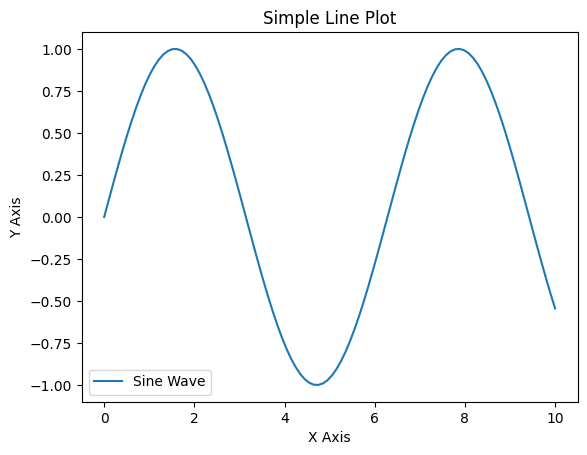

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y, label="Sine Wave")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Simple Line Plot")
plt.legend()
plt.show()

`Bar Chart`

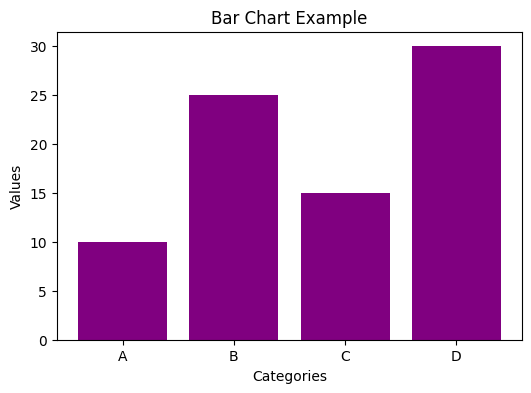

In [ ]:
categories = ['A', 'B', 'C', 'D']
values = [10, 25, 15, 30]
plt.figure(figsize=(6, 4))
plt.bar(categories, values, color='purple')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart Example")
plt.show()

`Histogram (Distribution of Data)`

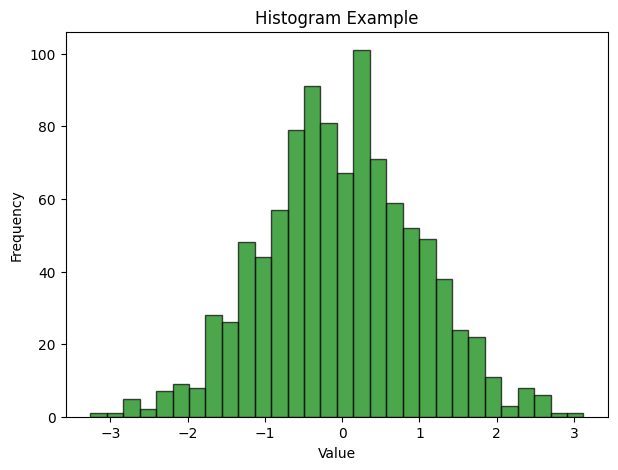

In [ ]:
data = np.random.randn(1000)
plt.figure(figsize=(7, 5))
plt.hist(data, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram Example")
plt.show()

**Seaborn - Statistical Data Visualization**

`Histogram & KDE Plot`

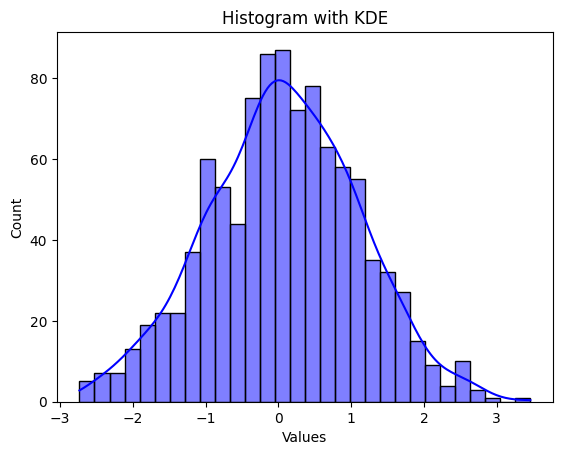

In [ ]:
import seaborn as sns
import pandas as pd

# Creating sample data
data = np.random.randn(1000)

df = pd.DataFrame(data, columns=['Values'])

# Plot
sns.histplot(df['Values'], bins=30, kde=True, color='blue')
plt.title("Histogram with KDE")
plt.show()

`Box Plot (Detecting Outliers)`

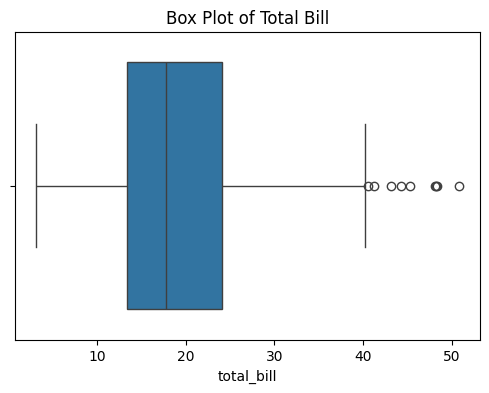

In [ ]:
tips = sns.load_dataset('tips')
plt.figure(figsize=(6, 4))
sns.boxplot(x=tips['total_bill'])
plt.title("Box Plot of Total Bill")
plt.show()

`Pair Plot (Exploring Relationships)`

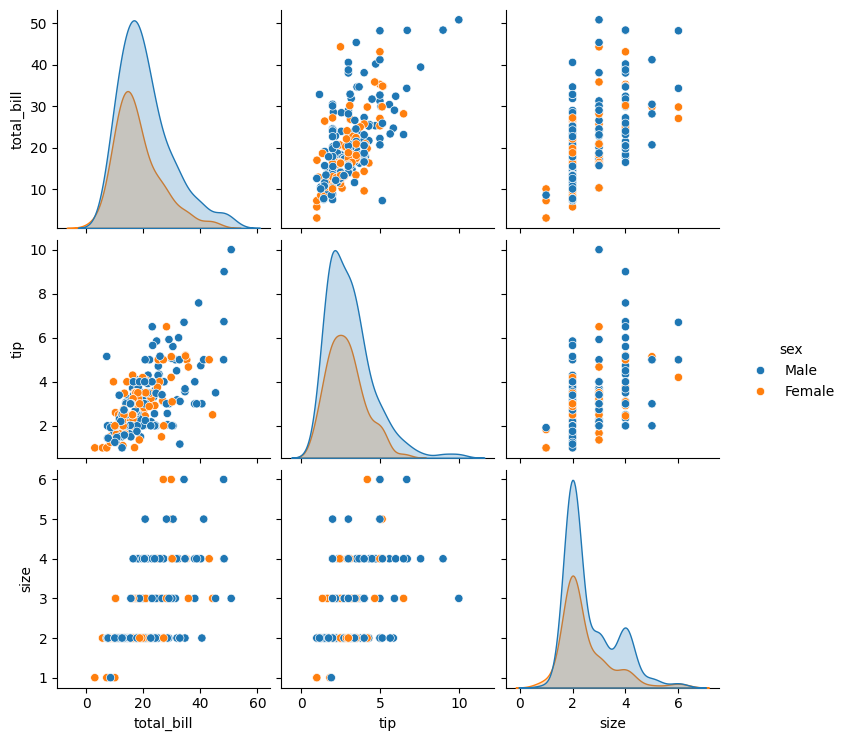

In [ ]:
sns.pairplot(tips, hue='sex')
plt.show()

`Heatmap (Correlation Analysis)`

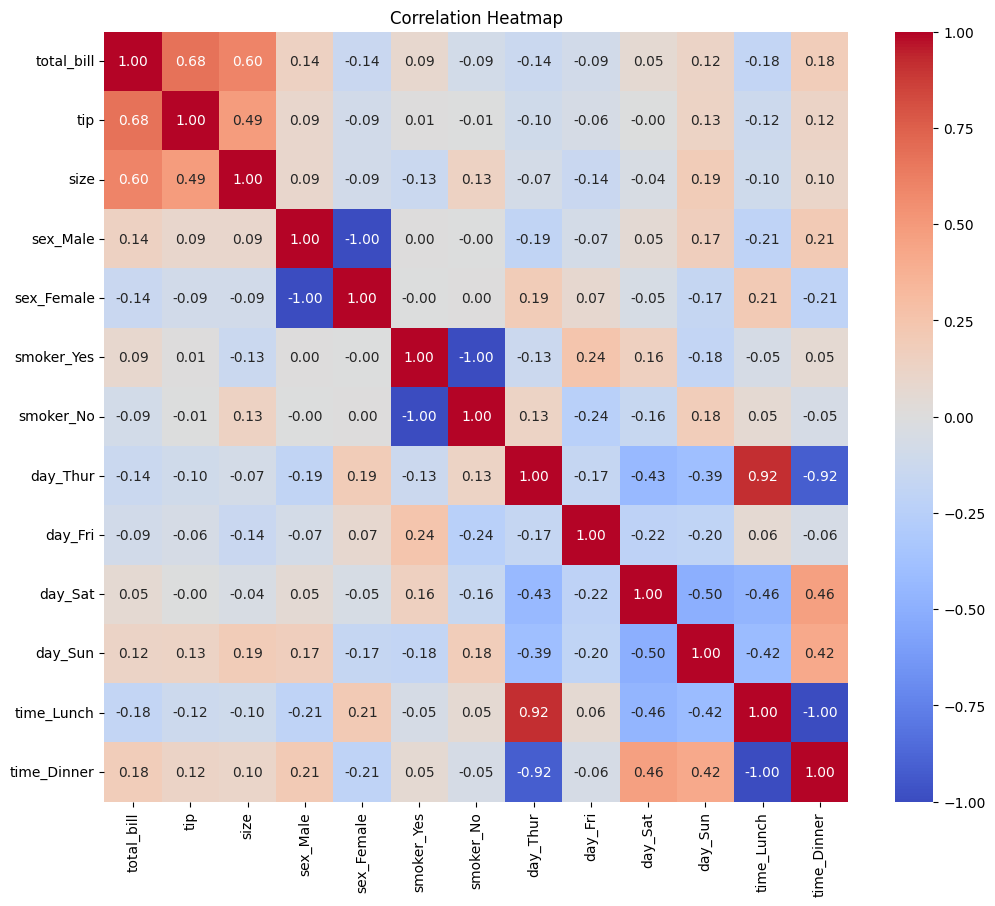

In [ ]:
# Convert 'sex' and 'smoker' columns to numerical representations using one-hot encoding
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])

# Now calculate the correlation matrix
corr_matrix = tips.corr()

plt.figure(figsize=(12, 10))  # Adjust figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()